In [80]:
## Overview
#This project implements a hybrid deep learning approach for bottleneck detection in IoT based on the paper "A Hybrid Deep Learning Approach for Bottleneck Detection in IoT".
#The implementation focuses on utilizing a combination of Deep Neural Network (DNN) and Long Short-Term Memory (LSTM) models to detect bottlenecks in IoT environments.

***A Hybrid Deep Learning Approach for Bottleneck Detection***

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model,Sequential
from keras.layers import Input, Dense, LSTM, Flatten, concatenate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.callbacks import History
import seaborn as sns
from keras.layers import Input



***Data Loading***

In [82]:
data = pd.read_csv(r"/content/Datasets.csv")

In [83]:
data.head(2)

,ID,Sender_IP,Sender_Port,Target_IP,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,10.42.0.211-104.97.95.172-59522-80-6,192.168.2.112,2142,75.126.101.175,443,1,4.28,6.039028,1174,856.833333,1894,11862,27450.72222,12462,0,18,15,0.833333,0
1,216.58.217.68-10.42.0.211-443-59345-6,147.32.84.170,2108,208.100.48.73,22,1,3.00,1.500000,0,0.000000,192,0,0.00000,0,0,4,0,0.000000,1


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5472 non-null   object 
 1   Sender_IP           5472 non-null   object 
 2   Sender_Port         5472 non-null   int64  
 3   Target_IP           5472 non-null   object 
 4   Target_Port         5472 non-null   int64  
 5   Transport_Protocol  5472 non-null   int64  
 6   Duration            5472 non-null   float64
 7   AvgDuration         5472 non-null   float64
 8   PBS                 5472 non-null   int64  
 9   AvgPBS              5472 non-null   float64
 10  TBS                 5472 non-null   int64  
 11  PBR                 5472 non-null   int64  
 12  AvgPBR              5472 non-null   float64
 13  TBR                 5472 non-null   int64  
 14  Missed_Bytes        5472 non-null   int64  
 15  Packets_Sent        5472 non-null   int64  
 16  Packet

In [85]:
data.isna().count

<bound method DataFrame.count of          ID  Sender_IP  Sender_Port  Target_IP  Target_Port  \
0     False      False        False      False        False   
1     False      False        False      False        False   
2     False      False        False      False        False   
3     False      False        False      False        False   
4     False      False        False      False        False   
...     ...        ...          ...        ...          ...   
5467  False      False        False      False        False   
5468  False      False        False      False        False   
5469  False      False        False      False        False   
5470  False      False        False      False        False   
5471  False      False        False      False        False   

      Transport_Protocol  Duration  AvgDuration    PBS  AvgPBS    TBS    PBR  \
0                  False     False        False  False   False  False  False   
1                  False     False        False  F

***Visualizing Important Features***

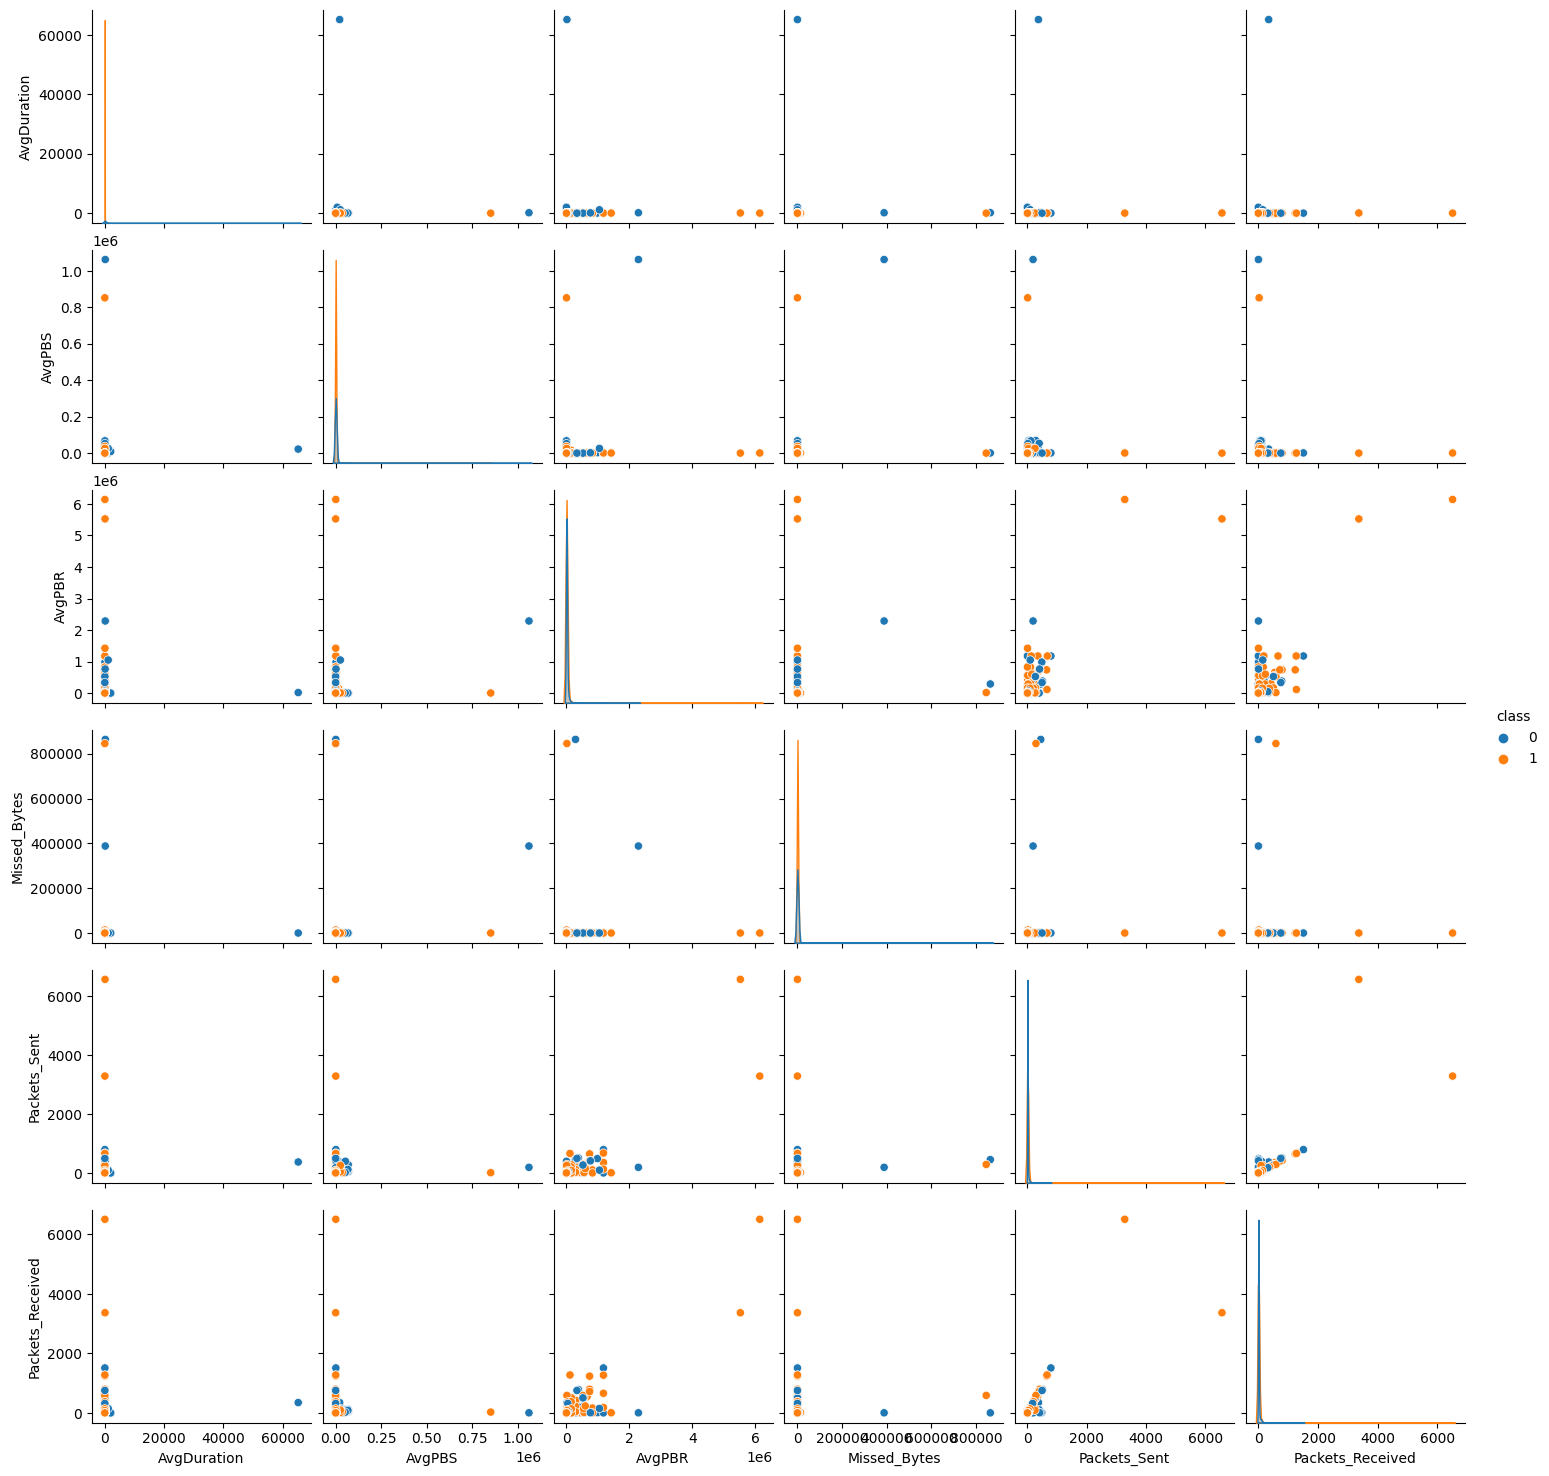

In [86]:
# Selecting features for visualization
selected_features = [ 'AvgDuration',  'AvgPBS',  'AvgPBR', 'Missed_Bytes', 'Packets_Sent', 'Packets_Received',  'class']

# Pair plot
sns.pairplot(data[selected_features], hue='class')
plt.show()


***Encoding features - Non numerical into numerical***

In [87]:
# Extracting non-numeric features and encoding them
non_numeric_cols = ['ID', 'Sender_IP', 'Target_IP', 'Transport_Protocol']
encoder = LabelEncoder()

In [88]:
for col in non_numeric_cols:
    data[col] = encoder.fit_transform(data[col])

In [89]:
# Data Preprocessing
X = data.drop(columns=['class'])
y = data['class']

***Train_Test_Split***

In [90]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
data.head(2)

,ID,Sender_IP,Sender_Port,Target_IP,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,1488,97,2142,1555,443,0,4.28,6.039028,1174,856.833333,1894,11862,27450.72222,12462,0,18,15,0.833333,0
1,5003,30,2108,756,22,0,3.00,1.500000,0,0.000000,192,0,0.00000,0,0,4,0,0.000000,1


***Standardization/Normalization***

In [92]:
# Standardization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [93]:
# Normalization
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_std)
X_test_norm = scaler.transform(X_test_std)

***Neural Network Model***

In [94]:
# Build the Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train_norm.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(lr=0.001)  # Adjust learning rate if needed
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
model.fit(X_train_norm, y_train, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
110/110 [==============================] - 2s 8ms/step - loss: 0.6120 - accuracy: 0.6887 - val_loss: 0.5369 - val_accuracy: 0.7626
Epoch 2/10
110/110 [==============================] - 1s 5ms/step - loss: 0.4795 - accuracy: 0.7532 - val_loss: 0.4635 - val_accuracy: 0.7603
Epoch 3/10
110/110 [==============================] - 1s 5ms/step - loss: 0.4233 - accuracy: 0.7806 - val_loss: 0.4310 - val_accuracy: 0.7831
Epoch 4/10
110/110 [==============================] - 1s 5ms/step - loss: 0.3894 - accuracy: 0.7949 - val_loss: 0.4244 - val_accuracy: 0.7717
Epoch 5/10
110/110 [==============================] - 0s 5ms/step - loss: 0.3622 - accuracy: 0.7961 - val_loss: 0.3926 - val_accuracy: 0.7831
Epoch 6/10
110/110 [==============================] - 1s 5ms/step - loss: 0.3379 - accuracy: 0.8109 - val_loss: 0.3783 - val_accuracy: 0.8082
Epoch 7/10
110/110 [==============================] - 0s 3ms/step - loss: 0.3193 - accuracy: 0.8172 - val_loss: 0.3624 - val_accuracy: 0.8162
Epoch 

In [95]:
# Evaluate the model
y_pred = (model.predict(X_test_norm) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

35/35 [==============================] - 0s 2ms/step
Accuracy: 0.8493150684931506
Confusion Matrix:
[[359  48]
 [117 571]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       407
           1       0.92      0.83      0.87       688

    accuracy                           0.85      1095
   macro avg       0.84      0.86      0.84      1095
weighted avg       0.86      0.85      0.85      1095



***LSTM Model***

In [96]:
# Reshape data for LSTM
X_train_reshaped = X_train_norm.reshape((X_train_norm.shape[0], 1, X_train_norm.shape[1]))
X_test_reshaped = X_test_norm.reshape((X_test_norm.shape[0], 1, X_test_norm.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, X_train_norm.shape[1]), return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(lr=0.001)  # Adjust learning rate if needed
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
110/110 [==============================] - 8s 20ms/step - loss: 0.6395 - accuracy: 0.6421 - val_loss: 0.5583 - val_accuracy: 0.7534
Epoch 2/10
110/110 [==============================] - 1s 11ms/step - loss: 0.4982 - accuracy: 0.7501 - val_loss: 0.4833 - val_accuracy: 0.7511
Epoch 3/10
110/110 [==============================] - 1s 11ms/step - loss: 0.4597 - accuracy: 0.7552 - val_loss: 0.4646 - val_accuracy: 0.7557
Epoch 4/10
110/110 [==============================] - 1s 11ms/step - loss: 0.4476 - accuracy: 0.7506 - val_loss: 0.4535 - val_accuracy: 0.7511
Epoch 5/10
110/110 [==============================] - 1s 9ms/step - loss: 0.4396 - accuracy: 0.7526 - val_loss: 0.4590 - val_accuracy: 0.7420
Epoch 6/10
110/110 [==============================] - 1s 8ms/step - loss: 0.4396 - accuracy: 0.7452 - val_loss: 0.4431 - val_accuracy: 0.7557
Epoch 7/10
110/110 [==============================] - 1s 7ms/step - loss: 0.4277 - accuracy: 0.7526 - val_loss: 0.4435 - val_accuracy: 0.7557
Ep

In [97]:
# Evaluate the model
y_pred = (model.predict(X_test_reshaped) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

35/35 [==============================] - 1s 3ms/step
Accuracy: 0.7671232876712328
Confusion Matrix:
[[230 177]
 [ 78 610]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.57      0.64       407
           1       0.78      0.89      0.83       688

    accuracy                           0.77      1095
   macro avg       0.76      0.73      0.74      1095
weighted avg       0.76      0.77      0.76      1095



***Hybrid Model - DNN+LSTM***

In [98]:
# Reshape data for LSTM
X_train_reshaped = X_train_norm.reshape((X_train_norm.shape[0], X_train_norm.shape[1], 1))
X_test_reshaped = X_test_norm.reshape((X_test_norm.shape[0], X_test_norm.shape[1], 1))

# Define the input layer
input_layer = Input(shape=(X_train_norm.shape[1], 1))

# DNN Layers
dnn_layer1 = Dense(64, activation='relu')(input_layer)
dnn_layer2 = Dense(32, activation='relu')(dnn_layer1)
dnn_layer3 = Dense(16, activation='relu')(dnn_layer2)

# LSTM Layers
lstm_layer1 = LSTM(50, return_sequences=True)(input_layer)
lstm_layer2 = LSTM(50, return_sequences=True)(lstm_layer1)
lstm_layer3 = LSTM(50)(lstm_layer2)

# Global Average Pooling for LSTM output
lstm_layer3_avg = Flatten()(lstm_layer3)

# Replicate the DNN output to match the size of LSTM output
dnn_replicated = Dense(50, activation='relu')(Flatten()(dnn_layer3))

# Merge Layers
merged_layer = concatenate([dnn_replicated, lstm_layer3_avg])

# Dense Layers
dense_layer1 = Dense(32, activation='relu')(merged_layer)
dense_layer2 = Dense(16, activation='relu')(dense_layer1)

# Output Layer
output_layer = Dense(1, activation='sigmoid')(dense_layer2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
optimizer = Adam(lr=0.001)  # Adjust learning rate if needed
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


***Model Training***

Epoch 1/10
110/110 [==============================] - 14s 49ms/step - loss: 0.5569 - accuracy: 0.7115 - val_loss: 0.4750 - val_accuracy: 0.7363
Epoch 2/10
110/110 [==============================] - 4s 41ms/step - loss: 0.4290 - accuracy: 0.7561 - val_loss: 0.4042 - val_accuracy: 0.7740
Epoch 3/10
110/110 [==============================] - 5s 44ms/step - loss: 0.3612 - accuracy: 0.7929 - val_loss: 0.3583 - val_accuracy: 0.8059
Epoch 4/10
110/110 [==============================] - 4s 34ms/step - loss: 0.3105 - accuracy: 0.8378 - val_loss: 0.3240 - val_accuracy: 0.8482
Epoch 5/10
110/110 [==============================] - 4s 34ms/step - loss: 0.2803 - accuracy: 0.8440 - val_loss: 0.3053 - val_accuracy: 0.8288
Epoch 6/10
110/110 [==============================] - 6s 52ms/step - loss: 0.2782 - accuracy: 0.8420 - val_loss: 0.3280 - val_accuracy: 0.8436
Epoch 7/10
110/110 [==============================] - 4s 33ms/step - loss: 0.2563 - accuracy: 0.8583 - val_loss: 0.2955 - val_accuracy: 0.845

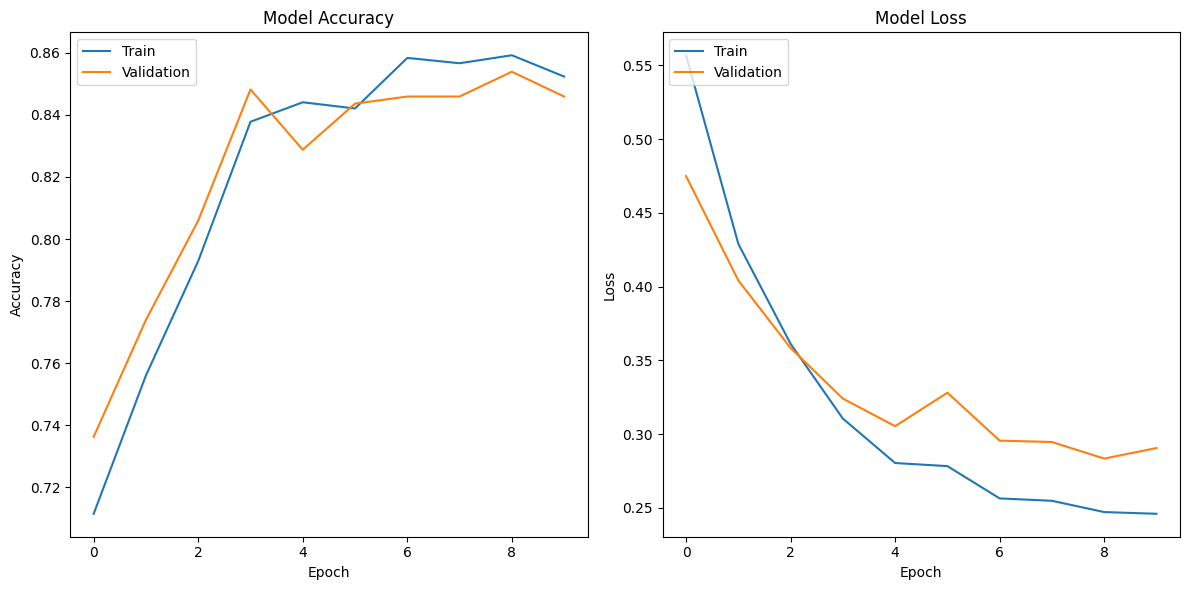

In [99]:
# Train the model and store the history
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Visualize training history
plot_training_history(history)


***Model Evaluation***

In [100]:
# Model Evaluation
y_pred_prob = model.predict(X_test_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int)  # Apply threshold (0.5 for binary classification)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


35/35 [==============================] - 2s 10ms/step
Accuracy: 0.8474885844748858
Confusion Matrix:
[[359  48]
 [119 569]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       407
           1       0.92      0.83      0.87       688

    accuracy                           0.85      1095
   macro avg       0.84      0.85      0.84      1095
weighted avg       0.86      0.85      0.85      1095

